In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats
import numpy as np

In [2]:
data = {
    "vibration":[56,59,52,49,49,51,48,50,53,44],
    "heat":[47,61,52,41,49,49,56,46,60,51]
}
df = pd.DataFrame(data)
df

vibration  heat
0         56    47
1         59    61
2         52    52
3         49    41
4         49    49
5         51    49
6         48    56
7         50    46
8         53    60
9         44    51

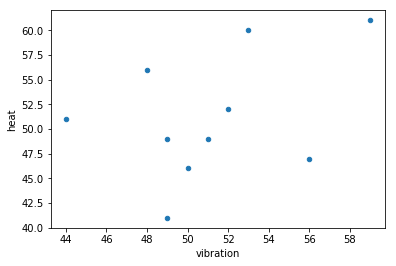

In [3]:
df.plot.scatter('vibration','heat')

In [4]:
def simple_anomaly_detector(df, test_value):
    means = df.mean()
    stds = df.std()
    
    probability = 1
    for m,s,v in zip(means, stds, test_value):
        probability = probability * scipy.stats.norm(m, s).pdf(v)
    
    return probability, probability < np.power(0.05, len(test_value))

In [5]:
data = np.array([[[1,2],[3,4]],
          [[2,2],[2,2]],
          [[1,1],[1,1]],
          [[10,10],[10,10]],
          [[1,1],[1,1]],
          [[2,2],[2,2]],
          [[1,1],[1,1]],
          [[4,3],[2,1]]
         ])
data

array([[[ 1,  2],
        [ 3,  4]],

       [[ 2,  2],
        [ 2,  2]],

       [[ 1,  1],
        [ 1,  1]],

       [[10, 10],
        [10, 10]],

       [[ 1,  1],
        [ 1,  1]],

       [[ 2,  2],
        [ 2,  2]],

       [[ 1,  1],
        [ 1,  1]],

       [[ 4,  3],
        [ 2,  1]]])

In [6]:
simple_anomaly_detector(df, [2])

(4.926620102214167e-31, True)

In [7]:
data = data.flatten().reshape(data.shape[0], data.shape[1] * data.shape[2])

In [8]:
data

array([[ 1,  2,  3,  4],
       [ 2,  2,  2,  2],
       [ 1,  1,  1,  1],
       [10, 10, 10, 10],
       [ 1,  1,  1,  1],
       [ 2,  2,  2,  2],
       [ 1,  1,  1,  1],
       [ 4,  3,  2,  1]])

In [9]:
df = pd.DataFrame(data)
df

0   1   2   3
0   1   2   3   4
1   2   2   2   2
2   1   1   1   1
3  10  10  10  10
4   1   1   1   1
5   2   2   2   2
6   1   1   1   1
7   4   3   2   1

In [10]:
simple_anomaly_detector(df, [1,1,1,1])

(0.00015038793692594921, False)

In [11]:
simple_anomaly_detector(df, [100,100,1,1])

(0.0, True)

In [13]:
df.mean()

0    2.75
1    2.75
2    2.75
3    2.75
dtype: float64

In [14]:
df.std()

0    3.105295
1    3.011881
2    3.011881
3    3.105295
dtype: float64

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


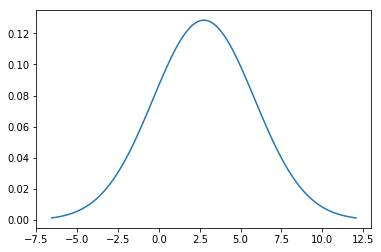

In [15]:
import matplotlib.mlab as mlab
mu = df.mean()[0]
sigma = df.std()[0]
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

In [16]:
simple_anomaly_detector(df, [mu - 2*sigma,mu,mu,mu])

(3.918951433182429e-05, False)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  2.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  2.,  0.,
         1.,  1.,  1.,  0.,  1.,  2.,  1.,  4.,  2.,  0.,  2.,  1.,  1.,
         1.,  3.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  3.,  1.,  3.,
         0.,  1.,  1.,  1.,  0.,  2.,  2.,  3.,  2.

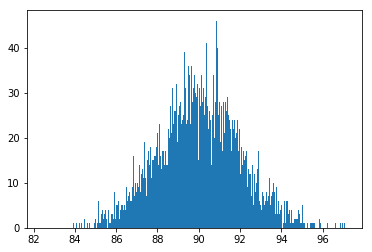

In [17]:
values= np.random.normal(90,2, 10000)
plt.hist(values,bins=1000)